# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Ekron Nauli Simanungkalit]
- **Email:** [ekronsimanungkalit@gmail.com]
- **ID Dicoding:** [ekron12]

## Menentukan Pertanyaan Bisnis

- Bagaimana perbandingan jumlah pengguna casual dan registered pada hari libur/akhir pekan dengan hari kerja?
- Bagaimana perbandingan jumlah pengguna casual dan registered pada tiap musim?

## Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Wrangling

### Gathering Data

In [2]:
df_day = pd.read_csv('Data/day.csv')
df_hour = pd.read_csv('Data/hour.csv')

Data df_day

In [3]:
print(df_day.shape)
df_day.head()

(731, 16)


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Data df_hour

In [4]:
print(df_hour.shape)
df_hour.head()

(17379, 17)


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Perbandingan df_hour dengan df_day:

In [5]:
print(f"{df_hour['temp'].iloc[0:24].mean():.6f}" == f"{df_day['temp'][0]:.6f}")
print(f"{df_hour['temp'].iloc[24:47].mean():.6f}" == f"{df_day['temp'][1]:.6f}")
print(f"{df_hour['temp'].iloc[47:69].mean():.6f}" == f"{df_day['temp'][2]:.6f}")
print(f"{df_hour['temp'].iloc[69:91].mean():.6f}" == f"{df_day['temp'][3]:.6f}")

True
True
True
True


**Insight:**
- Pada data hour.csv terdapat satu feature tambahan yaitu 'hr'.


### Assessing Data

Assesing df_day:
- Missing value


In [6]:
(df_day.isna() | df_day.isnull()).sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Assesing df_day:
- Duplicate data 

In [7]:
df_day.duplicated().sum()

0

Assesing df_hour:
- Missing value

In [8]:
(df_hour.isna() | df_day.isnull()).sum()

atemp         0.0
casual        0.0
cnt           0.0
dteday        0.0
holiday       0.0
hr            0.0
hum           0.0
instant       0.0
mnth          0.0
registered    0.0
season        0.0
temp          0.0
weathersit    0.0
weekday       0.0
windspeed     0.0
workingday    0.0
yr            0.0
dtype: float64

Assesingg df_hour:
- Duplicate data

In [9]:
df_hour.duplicated().sum()

0

**Insight:**
- Tidak data yang hilang maupun duplikat pada kedua data `df_day` dan `df_hour`


### Cleaning Data

Mengubah data `'weekday'` menjadi data kategoris sesuai dengan nama-nama hari.

In [10]:
day = {
    0:'Sunday',
    1:'Monday',
    2:'Tuesday',
    3:'Wednesday',
    4:'Thursday',
    5:'Friday',
    6:'Saturday'
}

df_day['weekday'] = df_day['weekday'].map(day)
df_hour['weekday'] = df_hour['weekday'].map(day)

In [11]:
df_day['weekday'].isna().sum()

0

In [12]:
df_day['weekday'].isna().sum()

0

Mengubah data `'season'` menjadi data kategoris sesuai dengan nama-nama musim.

In [13]:
season = {
    1:'spring',
    2:'summer',
    3:'fall',
    4:'winter'
}

df_day['season'] = df_day['season'].map(season)
df_hour['season'] = df_hour['season'].map(season)

In [14]:
df_day['season'].isna().sum()

0

In [15]:
df_hour['season'].isna().sum()

0

In [16]:
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,spring,0,1,0,0,Saturday,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,spring,0,1,1,0,Saturday,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,spring,0,1,2,0,Saturday,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,spring,0,1,3,0,Saturday,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,spring,0,1,4,0,Saturday,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [17]:
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,spring,0,1,0,Saturday,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,spring,0,1,0,Sunday,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,spring,0,1,0,Monday,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,spring,0,1,0,Tuesday,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,spring,0,1,0,Wednesday,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Data pada feature weekday telah diubah menjadi data kategoris sesuai nama-nama hari.
- Data pada feature season telah diubah menjadi data kategoris sesuai dengan musim yaitu 'spring', 'summer', 'fall' dan 'winter'

## Exploratory Data Analysis (EDA)

### Explore day.csv

Parameter statistik:

In [18]:
df_day.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731,731.000000,731.000000,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,4,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,fall,NaN,NaN,NaN,Saturday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,188,NaN,NaN,NaN,105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,NaN,0.500684,6.519836,0.028728,NaN,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,NaN,0.500342,3.451913,0.167155,NaN,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,NaN,0.000000,1.000000,0.000000,NaN,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,NaN,0.000000,4.000000,0.000000,NaN,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,NaN,1.000000,7.000000,0.000000,NaN,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,NaN,1.000000,10.000000,0.000000,NaN,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


Tabel pivot hari kerja (working day) terhadap jumlah pengguna casual dan juga registered.

In [19]:
df_day.groupby(by='workingday').agg({
    'casual':'sum',
    'registered':'sum',
    'cnt':'sum'
})

,casual,registered,cnt
workingday,,,
0,316732,683537,1000269
1,303285,1989125,2292410


Tabel pivot musim (season) terhadap jumlah pengguna casual dan juga registered.

In [20]:
df_day.groupby(by='season').agg({
    'casual':'sum',
    'registered':'sum',
    'cnt':'sum'
}).sort_values(by='cnt',ascending=False)

,casual,registered,cnt
season,,,
fall,226091,835038,1061129
summer,203522,715067,918589
winter,129782,711831,841613
spring,60622,410726,471348


**Insight:**
- Dari tabel pivot pertama dapat dilihat bahwa jumlah pengguna lebih banyak ketika hari libur (0) yang didominasi oleh pengguna registered.
- Dari tabel pivot kedua juga dapat dilihat bahwa pada musim gugur (fall) jumlah pengguna lebih banyak yang didominasi oleh pengguna registered.

## Visualization & Explanatory Analysis

### Pertanyaan 1:  Bagaimana perbandingan jumlah pengguna casual dan registered pada hari libur/akhir pekan dengan hari kerja?

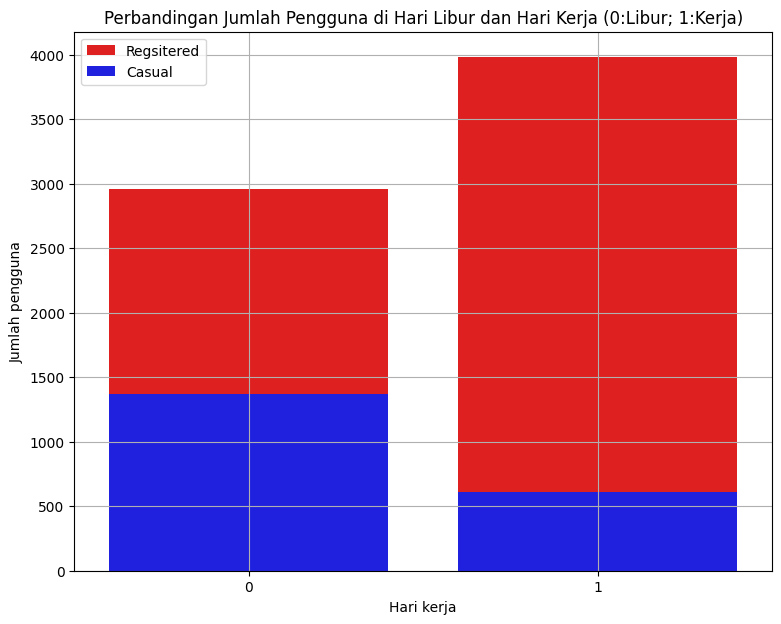

In [21]:
fig = plt.subplots(figsize=(9,7))
sns.barplot(data=df_day, x="workingday", y="registered", errorbar=None, color='red')
sns.barplot(data=df_day, x="workingday", y="casual", errorbar=None, color='blue')
plt.title('Perbandingan Jumlah Pengguna di Hari Libur dan Hari Kerja (0:Libur; 1:Kerja)')
plt.ylabel('Jumlah pengguna')
plt.xlabel('Hari kerja')
plt.legend(['Regsitered', 'Casual'])
plt.grid(True)
plt.show()

Pada sumbu x, 0 mewakili hari libur sedangkan 1 mewakili hari kerja.

### Pertanyaan 2: Bagaimana perbandingan jumlah pengguna casual dan registered pada tiap musim?

In [22]:
season_df = df_day.groupby(by='season').agg({
    'casual':'sum',
    'registered':'sum',
    'cnt':'sum'
}).sort_values(by='cnt', ascending=False)
season_df

,casual,registered,cnt
season,,,
fall,226091,835038,1061129
summer,203522,715067,918589
winter,129782,711831,841613
spring,60622,410726,471348


Visualisasi menggunakan pie chart

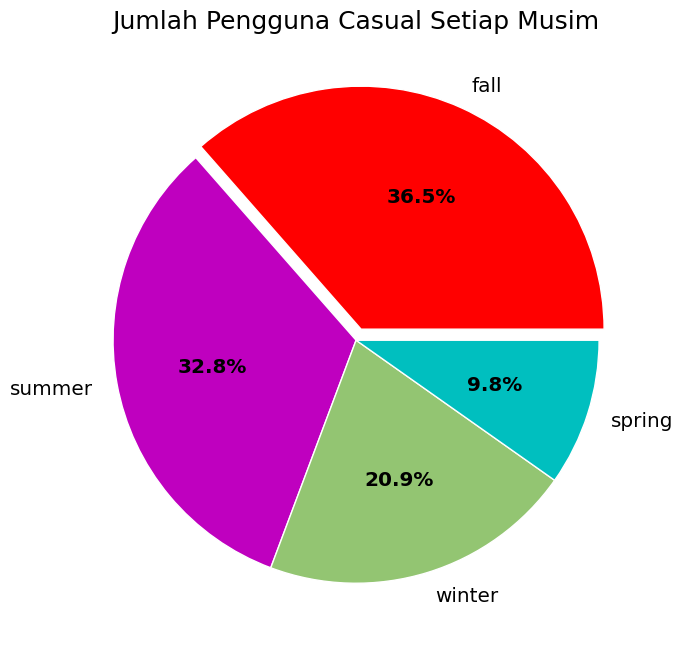

In [23]:
season = ('fall','summer','winter','spring')
colors = ('r', 'm', '#93C572', 'c')
explode = (0.05, 0, 0, 0)
 
fig, ax = plt.subplots(figsize=(7, 7))

patches, texts, pcts = ax.pie(
    season_df['casual'], labels=season, autopct='%.1f%%', colors=colors,
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'},
    textprops={'size': 'x-large'}, explode=explode)

plt.setp(pcts, color='black', fontweight='bold')
ax.set_title('Jumlah Pengguna Casual Setiap Musim', fontsize=18)
plt.tight_layout()

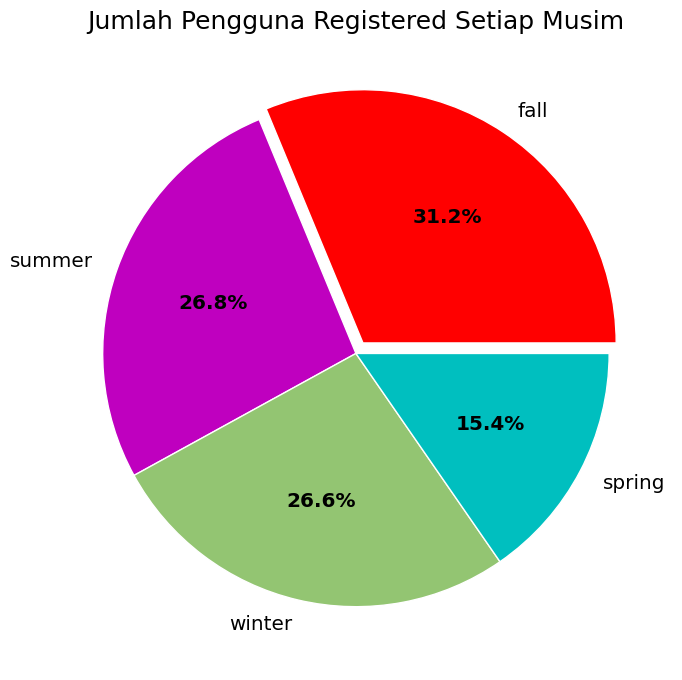

In [24]:
season = ('fall','summer','winter','spring')
colors = ('r', 'm', '#93C572', 'c')
explode = (0.05, 0, 0, 0)
 
fig, ax = plt.subplots(figsize=(7, 7))

patches, texts, pcts = ax.pie(
    season_df['registered'], labels=season, autopct='%.1f%%',colors=colors,
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'},
    textprops={'size': 'x-large'}, explode=explode)

plt.setp(pcts, color='black', fontweight='bold')
ax.set_title('Jumlah Pengguna Registered Setiap Musim', fontsize=18)
plt.tight_layout()

**Insight:**
- Pada bar chart di atas dapat dilihat bahwa jumlah pengguna registered lebih banyak ketika hari kerja dibanding hari libur. Sebaliknya, jumlah pengguna casual lebih banyak ketika hari libur dibandingkan ketika hari kerja.
- Pada visualisasi dengan pie chart di atas, dapat dilihat bahwa pada musim gugur (fall) pengguna lebih banyak menggunakan Bike Sharing dibandingkan dengan musim-musim lain, di mana pada pengguna casual sebanyak 36.5% dan pada pengguna registered sebanyak 31.2%.

## Analisis Lanjutan (Opsional)

Menyimpan data ke file csv

In [120]:
df_day.to_csv('dashboard/cleaned_df_day.csv', index=False)
df_hour.to_csv('dashboard/cleaned_df_hour.csv', index=False)

## Conclusion

- Pertanyaan 1: Pengguna casual lebih sering menggunakan Bike Sharing ketika hari libur, sedangkan pengguna registered lebih sering menggunakan Bike Sharing ketika hari kerja.
- Pertanyaan 2: Sebanyak 36.5% pengguna casual menggunakan Bike Sharing pada musim gugur (fall) dan 32.8% pada musim panas (summer), di sisi lain, 31.2% pengguna registered menggunakan Bike Sharing lebih banyak pada musim gugur (fall) dan 26.8% pada musim panas (summer).